# HW 2
Teddy Kelly

In [1]:
import pandas as pd
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import random

## 1. Create Dataset with 1,000,000 rows and 4 variables

Below, I have created a dataset of four random variables with 1,000,000 observations. Both `x1` and `x2` are normally distributed with a mean and standard deviation of 0 and 1 respectively, while `x3` and `x4` are uniformly distributed between -1 and 1. To create the variables, I used the `random.normal` and `random.uniform` attributes in the numpy library. I then created a data frame with the four random variables and stored it into the variable `df`.

In [2]:
# Initialze number of rows in dataset
rows = 1000000

# Create normally distributed x1 and x2 variables
x1 = np.random.normal(loc=0, scale=1, size=rows)
x2 = np.random.normal(loc=0, scale=1, size=rows)

# Create uniformly distributed x3 and x4 variables
x3 = np.random.uniform(low=-1, high=1, size=rows)
x4 = np.random.uniform(low=-1, high=1, size=rows)

# Create data frame
df = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3, "x4": x4})


## 2. Add another variable, y, as a linear combination of the other variables

In the next code block, I added another variable named `y` into the dataset. It is a linear combination of the four variables above with coefficients I chose, an error term, and squaring the `x1` term.

In [3]:
# Initializing the coefficients and storing them in b1, b2, b3 , b4
b1, b2, b3, b4 = 0.1, 0.3, -0.25, 0.2

# Defining an error term that is uniformly distributed
error = np.random.uniform(low=-1, high=1, size=rows)

# Setting y equal to a linear combination of the variables in #1, the coefficients I defined, and an error term. The x1 variable is squared.
y = b1*x1**2 + b2*x2 + b3*x3 + b4*x4 + error

# Add the y variable to the first column of the data frame df.
df.insert(0, "y", y)


Below are four scatter plots representing the relationship between each of the x variables and the y variable in the dataset. We can see a quadratic relationship between `x1` and `y`, a fairly strong positive linear relationship between `x2` and `y`, a negative linear relationship between `x3` and `y`, and a weaker positive linear relationship between `x4` and `y`. These relationships all makes sense given the values of the coefficients used to define `y`.

Text(0.5, 1.0, 'y as a function of x4')

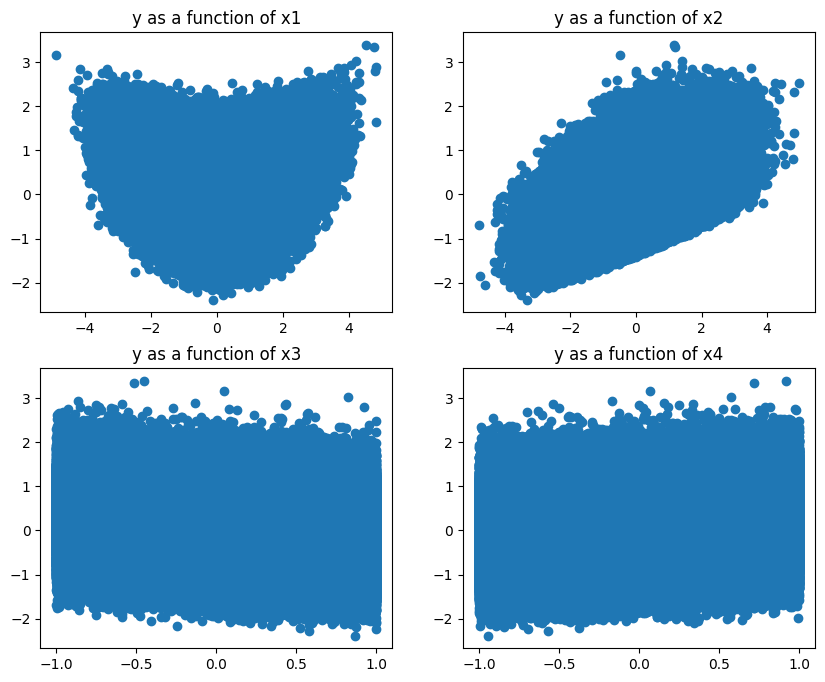

In [4]:
# Create a 2x2 grid that will be used for the four subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1st subplot representing x1 and y in top left
axes[0, 0].scatter(x1, y)
axes[0, 0].set_title("y as a function of x1")


# 2nd subplot representing x2 and y in top right
axes[0, 1].scatter(x2, y)
axes[0, 1].set_title("y as a function of x2")


# 3rd subplot representing x3 and y in bottom left
axes[1, 0].scatter(x3, y)
axes[1, 0].set_title("y as a function of x3")


# 4th subplot representing x4 and y in bottom right
axes[1, 1].scatter(x4, y)
axes[1, 1].set_title("y as a function of x4")




## 3. Divide the dataset into 70% for training and 30% for testing

Below I divided the dataset into 70% for training and the remaining 30% for testing. I used the scikit-learn library and the `train_test_split` function to divide the dataset properly. I set the 4 x variables as my features and y as my target variable.

In [5]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Define the feature variables and target variable
features = df[["x1", "x2", "x3", "x4"]]
target = df[["y"]]

# Use train_test_split to divide data into 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=1)

#Size of training and testing data
print(f"Training dataset size: {len(X_train)}")
print(f"Testing dataset size: {len(X_test)}")

Training dataset size: 700000
Testing dataset size: 300000


## 4. Estimate the the linear regression coefficients using OLS with the training data

Below, I created a function that peforms OLS regression. It takes 5 arguments with 4 being the x xariables and the 1 y variable. It then creates a design matrix with the given x variables, the y matrix using the y variable, and the beta_hat coefficient estimates using the OLS closed-form solution. The function returns beta_hat and the design matrix. 

I then used the `ols_regression` function to return the beta_hat estimates and the design matrix for the training data.

In [6]:
def ols_regression(x_1, x_2, x_3, x_4, y_var):
    X        = Matrix([x_1**2, x_2, x_3, x_4]).T # Create the design matrix
    y_mat    = Matrix(y_var)                     # Create the y vector
    beta_hat = ((X.T@X).inv())@(X.T)@y_mat       # Use OLS closed-form solution to compute beta_hat vector
    return beta_hat, X

# Run ols regression on the training data
beta_hat, X = ols_regression(X_train["x1"], X_train["x2"], X_train["x3"], X_train["x4"], y_train["y"])

Below are our `beta_hat` estimates. These represents the estimates for the coefficients in our estimating equation. We can see that they are very close approximations of the actual b1=0.1, b2=0.3, b3=-0.25, and b4=0.2 values that we defined in #2. 

# beta_hat estimates

In [7]:
print(f"b1 estimate: {beta_hat[0]} \nb2 estimate: {beta_hat[1]} \nb3 estimate: {beta_hat[2]} \nb4 estimate: {beta_hat[3]}")

b1 estimate: 0.100602329086272 
b2 estimate: 0.299854226535870 
b3 estimate: -0.247793294617712 
b4 estimate: 0.200985144712768


I calculated the fitted y values for the training data below using the `beta_hat` estimates by matrix multiplying them by the training data design matrix `X` and storing the results in `y_train_fitted`.

In [8]:
y_train_fitted = X@beta_hat

I did not plot the regression line on any of the graphs because it is a multiple linear regression that measures the partial effect that each explanatory variable has on the output `y`.

### Find Mean Standard Error of training and testing data

We already have everything we need to compute the MSE for the training data, but before we can do so for the testing data, we must first predict y values in the testing data using our model. This involves creating a design matrix with the x values from the testing data and then matrix multiplying the design matrix by the same `beta_hat` values from above. This will then give us our predictions for the y values in the testing data.

Below, I computed the design matrix for the testing data.

In [9]:
# Creating design matrix for testing data
design_test = Matrix([(X_test["x1"])**2, X_test["x2"], X_test["x3"], X_test["x4"]]).T

Matrix multiply the testing data design matrix and the beta_hat vector.

In [10]:
# Computing predicted y values for the testing data.
y_test_pred = design_test@beta_hat

We now have both our fitted y values for the training data and the predicted y values for the testing data. We can then use these values to compute the residuals for both the training and tsting data which can then be used to calculate the Mean Standard Error for the training and testing data respectively. Below is the formula for MSE: $$\frac{1}{n}\sum\limits_{i=1}^{n}\left(y_i-\hat{y}_i\right)^2$$

I have defined a function that calculates the MSE. It takes two arguments: actual y values and the predicted y values. Inside the functionl, the residuals are calculated first, then those residuals are sqaured, followed by taking the sum of those residuals, adn then finally that sum is divided by the length of the residuals vector. The function returns the Mean Standard Error. 

In [11]:
# The mean standard error functions takes two inputs: actual y values and the predicted y values.
def mse(actuals, predicted):
    residuals      = [x-y for x,y in zip(actuals, predicted)] # Create a list of residuals
    sq_residuals   = [x**2 for x in residuals]                # Create a list of the squared resiudals
    sum_sq_res     = sum(sq_residuals)                        # Compute the sum of the squared residuals
    mean_std_error = sum_sq_res/len(sq_residuals)             # Divide sum of squared residuals by the size of the list of squared residuals
    return residuals, mean_std_error                          # Return the mean standard error


Below I used the `mse` function to calculate the MSE for the training and testing data respectively.

# Mean Standard Error Values

In [13]:
# Calculating MSE for the training data
train_res, training_mse = mse(y_train["y"], y_train_fitted)

# Calculating MSE for the testing data
test_res, testing_mse = mse(y_test["y"], y_test_pred)

print(f"Training MSE: {training_mse}\n Testing MSE: {testing_mse}")

Training MSE: 0.333763585996781
 Testing MSE: 0.332889320656329


The average of squared differences between the estimated and actual y values are about. The training and testing MSE are extremely close together, indicating that the model we used is very well-balance for predicting data. I have run this notebook several times, and for the most recent time I ran the notebook, the testing MSE is actually less than the training MSE which I thought was a mistake, but apparently it is possible for that to happen and it actually indicates that the model is not over-fitted to the training data.

Text(0.5, 1.0, 'Testing residuals plot against x1 test variable')

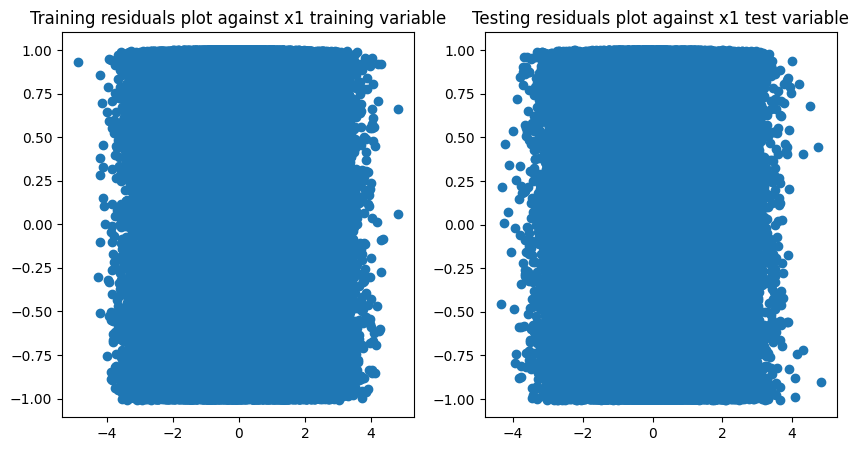

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].scatter(X_train["x1"], train_res)
axes[0].set_title("Training residuals plot against x1 training variable")

axes[1].scatter(X_test["x1"], test_res)
axes[1]. set_title("Testing residuals plot against x1 test variable")



## 5. Use bootstrapping to create 10 other sample from the data created in #2 above.

I created a list of 10 samples of the orginal data using a for loop.  Each sample is the same size as the original dataset which is 1,000,000 observations. 

In [19]:
# Initialize the number of samples to be 10
number_of_samples = 10

# Initialize empty list of samples. After the for loop finishes, the list will contain 10 different samples of the orginial data frame.
samples =[]

# For loop generates 10 samples data frames and adds each sample into the list named "samples".
for i in range(number_of_samples):
    sample_df = df.sample(n=1000000, replace = True, random_state=1) # create sample df with 1000000 observations
    samples.append(sample_df)                                        # append the sample to the samples list
    

## 6. Estimate the linear regression coefficents using OLS for each of the 10 boostrap samples in #5

I used a for loop to iterate through each sample data frame in the list `samples`. For each iteration, the specified sample is passed through the `ols_regression` function to calculate its beta_hat coefficient estimates. The beta_hat estimates are then appended to their corresponding list: b1s, b2s, b3s, or b4s. These lists will then be used to calculate the mean and sample standard deviations of the beta_coefficients tot compare them to the results we got in problem #4. 

I did not create graphs that show the regression lines for each of the 10 samples because this would make the code take forever. This block of code already takes a little over an hour to run as it is on my mac, so I decided it was best to not plot the graphs.

In [20]:
b1s = []
b2s = []
b3s = []
b4s = []
for sample in samples:
    beta_hat_samp, X_samp = ols_regression(sample["x1"], sample["x2"], sample["x3"], sample["x4"], sample["y"])
    b1s.append(beta_hat_samp[0])
    b2s.append(beta_hat_samp[1])
    b3s.append(beta_hat_samp[2])
    b4s.append(beta_hat_samp[3])

## 7. Compute the mean and standard deviation of the regression estimates

I kept getting errors when trying to compute the standard deviation of the b1s, b2s, b3s, and b4s lists. After asome investigation, I found that the values inside the lists are sympy floats and thus are not compatible with using numpy standard deviation. To fix this, I converted the elements in the lists to regular floats using list comprehensions.

In [47]:
# Convert the elements in the lists to regular floats
b1s = [float(x) for x in b1s]
b2s = [float(x) for x in b2s]
b3s = [float(x) for x in b3s]
b4s = [float(x) for x in b4s]

# Mean and standard deviation

In [48]:
print(f"mean of b1 values: {np.mean(b1s)}, standard deviation of b1 values: {np.std(b1s)}")
print(f"mean of b2 values: {np.mean(b2s)}, standard deviation of b2 values: {np.std(b2s)}")
print(f"mean of b3 values: {np.mean(b3s)}, standard deviation of b3 values: {np.std(b3s)}")
print(f"mean of b4 values: {np.mean(b4s)}, standard deviation of b4 values: {np.std(b4s)}")

mean of b1 values: 0.09972989291830989, standard deviation of b1 values: 0.00026626749741838593
mean of b2 values: 0.29909789586009466, standard deviation of b2 values: 0.0005998358433849547
mean of b3 values: -0.25218919951519936, standard deviation of b3 values: 0.0011980122502640764
mean of b4 values: 0.19886470863676578, standard deviation of b4 values: 0.0012100928825017749


## 8. What can you say about the coefficients in #4 are doing #7?

The coefficients we calculated in #4 using the training data are very similar to the mean values we see here in number 7 with relatively small values for the standard deviation. This suggests that those coefficient values we calculated with our training data are very accurate, suggesting our model is accurate and well designed to make predictions for new data.